In [19]:
import math
import numpy as np
import pandas as pd

import yfinance as yf

import datetime as dt
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# portfolio of tickers
tickers = ['TLT']
  
# start_date = "2015-01-01"
# end_date = dt.datetime.now().strftime("%Y-%m-%d")

# # Download historical data from yf API
# data = yf.download(tickers, start=start_date, end=end_date, group_by='ticker')

# # download data to csv
# data.to_csv(f"{tickers[0]}_data.csv")
     
# Load the CSV with MultiIndex columns (Tickers, OHLCV)
df = pd.read_csv(f"{tickers[0]}_data.csv", header=[0,1], index_col=0)

# Drop any rows that are completely NaN (e.g. 'Date' row)
df = df.dropna(how='all')

# Convert all values to float
df = df.astype(float)

# drop level 0 of the multiindex columns (the ticker symbol)
df.columns = df.columns.droplevel(0)

# datetime index
df.index = pd.to_datetime(df.index)

# Show the result
df.head()

Price,Open,High,Low,Close,Volume
Date,,,,,
2015-01-02,95.369545,96.404120,95.263822,96.147362,9432000.0
2015-01-05,96.668411,97.891783,96.630656,97.657684,9789500.0
2015-01-06,98.699788,100.051536,98.314659,99.417191,18331300.0
2015-01-07,98.699807,99.658867,98.299571,99.220871,9762900.0
2015-01-08,98.443039,98.450586,97.733184,97.906868,8055300.0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2696 entries, 2015-01-02 to 2025-09-22
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2696 non-null   float64
 1   High    2696 non-null   float64
 2   Low     2696 non-null   float64
 3   Close   2696 non-null   float64
 4   Volume  2696 non-null   float64
dtypes: float64(5)
memory usage: 126.4 KB


In [22]:
tlt = df.copy()

# log returns
tlt['log_return'] = np.log(tlt['Close'] / tlt['Close'].shift(1))

# day of month
tlt['day_of_month'] = tlt.index.day

# year
tlt['year'] = tlt.index.year

tlt.head()

Price,Open,High,Low,Close,Volume,log_return,day_of_month,year
Date,,,,,,,,
2015-01-02,95.369545,96.404120,95.263822,96.147362,9432000.0,NaN,2,2015
2015-01-05,96.668411,97.891783,96.630656,97.657684,9789500.0,0.015586,5,2015
2015-01-06,98.699788,100.051536,98.314659,99.417191,18331300.0,0.017857,6,2015
2015-01-07,98.699807,99.658867,98.299571,99.220871,9762900.0,-0.001977,7,2015
2015-01-08,98.443039,98.450586,97.733184,97.906868,8055300.0,-0.013332,8,2015


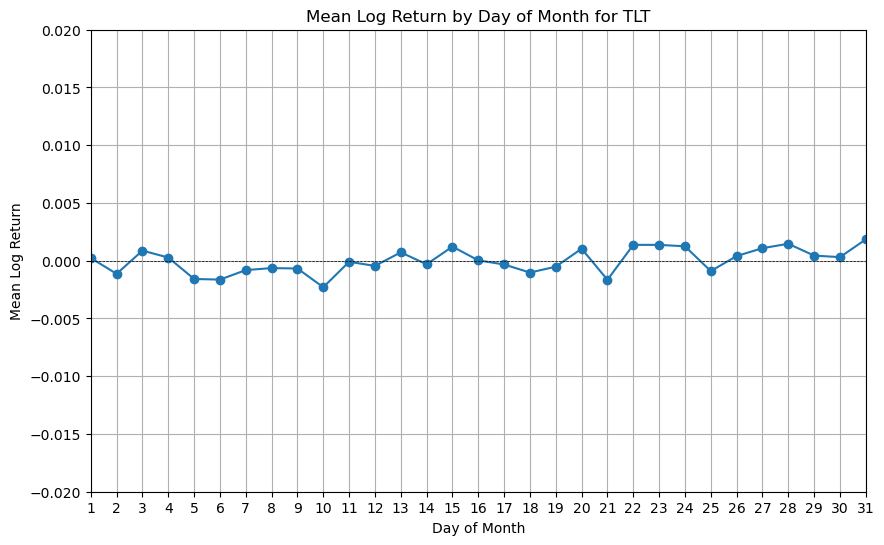

In [23]:
# mean log return by day of month
grouped_by_day = tlt.groupby('day_of_month')['log_return'].mean()

# plot the mean log return by day of month
plt.figure(figsize=(10, 6))
plt.plot(grouped_by_day.index, grouped_by_day.values, marker='o')
plt.title('Mean Log Return by Day of Month for TLT')
plt.xlabel('Day of Month')
plt.ylabel('Mean Log Return')
plt.grid()
plt.xticks(np.arange(1, 32, 1))
plt.xlim(1, 31)
plt.ylim(-0.02, 0.02)
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.show()

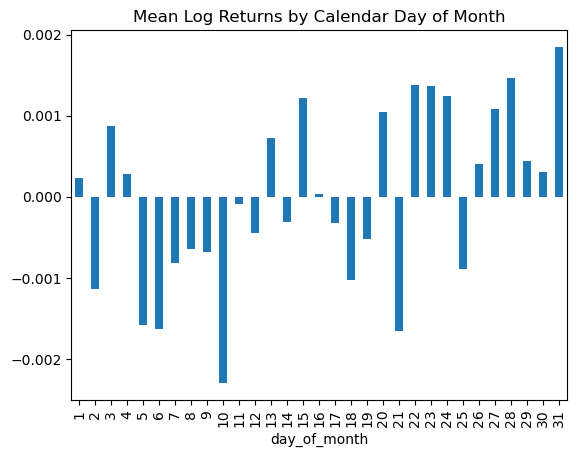

In [24]:
grouped_by_day.plot.bar(title="Mean Log Returns by Calendar Day of Month");

In [ ]:
tlt["first_week_returns"] = 0.0
tlt.loc[tlt.day_of_month <= 7, "first_week_returns"] = tlt[tlt.day_of_month <= 7].log_return

tlt["last_week_returns"] = 0.0
tlt.loc[tlt.day_of_month >= 23, "last_week_returns"] = tlt[tlt.day_of_month >= 23].log_return
tlt["middle_week_returns"] = 0.0
tlt.loc[(tlt.day_of_month > 7) & (tlt.day_of_month < 23), "middle_week_returns"] = tlt[(tlt.day_of_month > 7) & (tlt.day_of_month < 23)].log_return

tlt["last_week_less_first_week"] = tlt.last_week_returns - tlt.first_week_returns

In [ ]:
(
    tlt.groupby("year")
    .last_week_less_first_week.mean()
    .plot.bar(title="Mean Log Strategy Returns by Year")
);

In [ ]:
(
    tlt.groupby("year")
    .last_week_less_first_week.sum()
    .cumsum()
    .plot(title="Cumulative Sum of Returns By Year")
);

In [ ]:
tlt.last_week_less_first_week.cumsum().plot(title="Cumulative Sum of Returns By Day");